<a href="https://colab.research.google.com/github/daeunkk/dl11/blob/main/project/dl11_prj03_CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

# import tensorflow as tf
from tensorflow.keras import datasets, layers, models
# import keras

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print(train_images.shape, train_labels.shape)
# 픽셀 값을 0~1 사이로 정규화한다. 
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential()
# CNN
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# DNN
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (60000,)


In [5]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

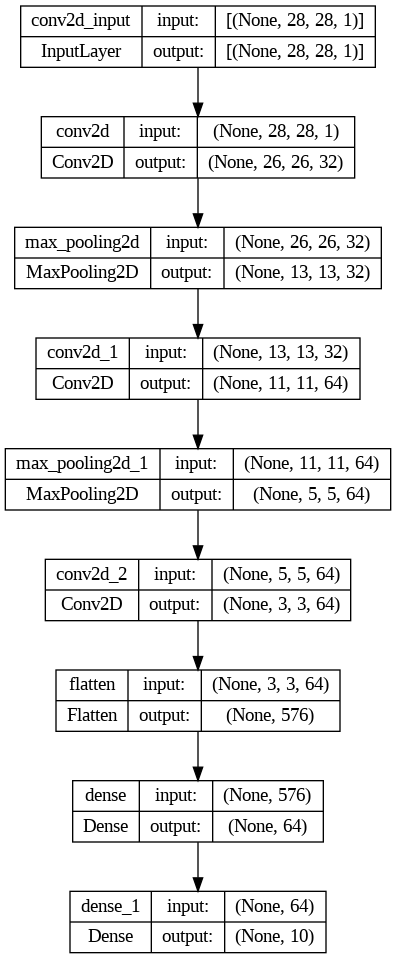

In [6]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0090 - accuracy: 0.9972
Epoch 2/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0073 - accuracy: 0.9976
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0069 - accuracy: 0.9977
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0056 - accuracy: 0.9981
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0062 - accuracy: 0.9981
Epoch 8/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0065 - accuracy: 0.9980
Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0047 - accuracy: 0.9985
Epoch 10/10
1875/1875 [==============================] - 61s 33m

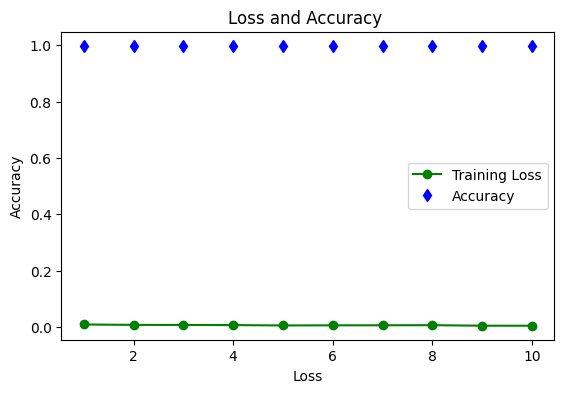

In [12]:
# [DIY-1] training history를 이용홰서 loss와 accuracy 그래프 그리기
import numpy as np
import matplotlib.pyplot as plt

history_dict = history.history 
loss = history_dict['loss']
accuracy = history_dict['accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, accuracy, 'bd', label='Accuracy')
plt.title('Loss and Accuracy ') 
plt.xlabel('Loss')
plt.ylabel('Accuracy')
plt.legend()

In [13]:
# [DIY-2] test 데이터에 모델 적용하고 정확도 계산
# 모델을 테스트 데이터에 적용하여 예측값 계산
predictions = model.predict(test_images)

# 예측값에서 가장 큰 확률을 갖는 클래스 선택
predicted_labels = np.argmax(predictions, axis=1)

# 정확도 계산
accuracy = np.mean(predicted_labels == test_labels)
print("Accuracy:", accuracy)

313/313 [==============================] - 4s 12ms/step
Accuracy: 0.9901


In [15]:


# [Prj-3] test 데이터를 validation으로 설정해서 모델을 다시 훈련시키시오.
# training history를 이용해서 loss, val_loss와 accuracy, val-accuracy 그래프 그리기
# file name: dlxx_prj03_CNN_MNIST.ipynb
# 깃허브의 project 폴더에 저장하시오.
from tensorflow.keras import datasets, layers, models

# 데이터 준비
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화한다.
train_images, test_images = train_images / 255.0, test_images / 255.0

# 검증 데이터 분리
val_images = train_images[:5000]
val_labels = train_labels[:5000]
train_images = train_images[5000:]
train_labels = train_labels[5000:]

# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1719/1719 [==============================] - 61s 35ms/step - loss: 0.1574 - accuracy: 0.9504 - val_loss: 0.0690 - val_accuracy: 0.9792
Epoch 2/20
1719/1719 [==============================] - 61s 36ms/step - loss: 0.0492 - accuracy: 0.9848 - val_loss: 0.0436 - val_accuracy: 0.9872
Epoch 3/20
1719/1719 [==============================] - 57s 33ms/step - loss: 0.0358 - accuracy: 0.9888 - val_loss: 0.0385 - val_accuracy: 0.9896
Epoch 4/20
1719/1719 [==============================] - 59s 34ms/step - loss: 0.0250 - accuracy: 0.9921 - val_loss: 0.0424 - val_accuracy: 0.9890
Epoch 5/20
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0213 - accuracy: 0.9932 - val_loss: 0.0361 - val_accuracy: 0.9900
Epoch 6/20
1719/1719 [==============================] - 60s 35ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.0369 - val_accuracy: 0.9906
Epoch 7/20
1719/1719 [==============================] - 58s 34ms/step - loss: 0.0132 - accuracy: 0.9958 - val_loss: 0.0395 -

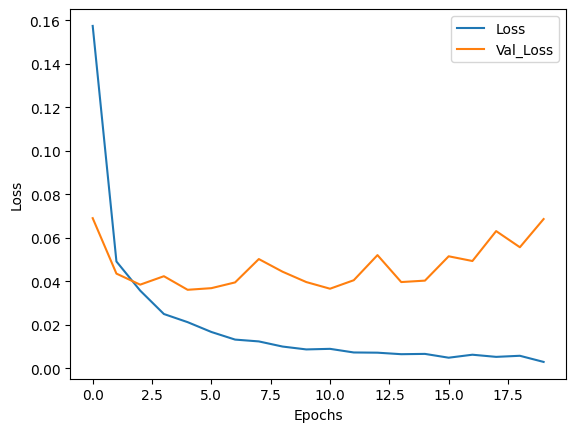

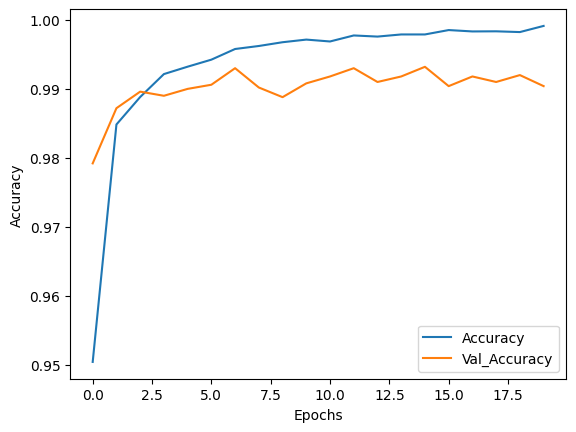

In [16]:

import matplotlib.pyplot as plt

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

# 손실 그래프 그리기
plt.plot(loss, label='Loss')
plt.plot(val_loss, label='Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프 그리기
plt.plot(accuracy, label='Accuracy')
plt.plot(val_accuracy, label='Val_Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
     